## 1 导入库

In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

## 2 基本数据分析

In [2]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
1,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
2,13,2,23,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
3,14,2,27,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
4,20,2,45,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0


In [3]:
train.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [4]:
train.shape,test.shape

((53053, 371), (22967, 371))

### 统计每列值的分布情况

In [5]:
## training data
stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of values in the biggest category', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
132,num_var27_0,1,0.0,100.000000,int64
328,saldo_var2_ult1,1,0.0,100.000000,int64
137,num_var29,1,0.0,100.000000,int64
135,num_var27,1,0.0,100.000000,int64
134,num_var28,1,0.0,100.000000,int64
133,num_var28_0,1,0.0,100.000000,int64
316,num_trasp_var17_out_hace3,1,0.0,100.000000,int64
320,num_trasp_var33_out_hace3,1,0.0,100.000000,int64
93,num_var6,1,0.0,100.000000,int64
304,num_reemb_var13_hace3,1,0.0,100.000000,int64


In [6]:
## testing data
stats = []
for col in test.columns:
    stats.append((col, test[col].nunique(), test[col].isnull().sum() * 100 / test.shape[0], test[col].value_counts(normalize=True, dropna=False).values[0] * 100, test[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of values in the biggest category', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
135,num_var27,1,0.0,100.000000,int64
317,num_trasp_var17_out_ult1,1,0.0,100.000000,int64
175,saldo_var18,1,0.0,100.000000,int64
304,num_reemb_var13_hace3,1,0.0,100.000000,int64
163,num_var46,1,0.0,100.000000,int64
162,num_var46_0,1,0.0,100.000000,int64
306,num_reemb_var17_hace3,1,0.0,100.000000,int64
156,num_var41,1,0.0,100.000000,int64
308,num_reemb_var33_hace3,1,0.0,100.000000,int64
309,num_reemb_var33_ult1,1,0.0,100.000000,int64


- 从上面可以看出存在很多列都是唯一值的情况，简单查看了下唯一值为0，所以我们需要删除这一列
- 所有列不存在缺失值
- 在数量比例比较高的列中，0是占比例最高的，比如`num_op_var41_ult3	`、`num_var22_hace3`等

### 目标值

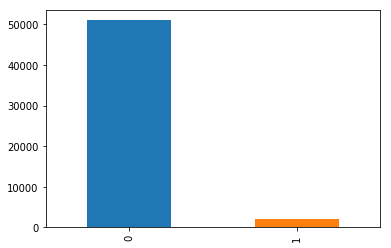

In [7]:
target_col = 'TARGET'
train[target_col].value_counts().plot(kind='bar')
plt.show()

In [8]:
train[target_col].value_counts()

0    50986
1     2067
Name: TARGET, dtype: int64

在训练集中，我们目标值0:1的比例约为24:1,说明样本分布不均衡

## 3 特征工程

In [9]:
# 删除类别唯一的特征
fea_cols=list(train.columns)
for col in train.columns:
    rate = train[col].value_counts(normalize=True, dropna=False).values[0]
    if rate==1.0:
        fea_cols.remove(col)
        print(col,rate)

ind_var2_0 1.0
ind_var2 1.0
ind_var6 1.0
ind_var27_0 1.0
ind_var28_0 1.0
ind_var28 1.0
ind_var27 1.0
ind_var29 1.0
ind_var41 1.0
ind_var46_0 1.0
ind_var46 1.0
num_var6 1.0
num_var27_0 1.0
num_var28_0 1.0
num_var28 1.0
num_var27 1.0
num_var29 1.0
num_var41 1.0
num_var46_0 1.0
num_var46 1.0
saldo_var6 1.0
saldo_var28 1.0
saldo_var27 1.0
saldo_var29 1.0
saldo_var41 1.0
saldo_var46 1.0
imp_amort_var18_hace3 1.0
imp_amort_var34_hace3 1.0
imp_reemb_var13_hace3 1.0
imp_reemb_var33_hace3 1.0
imp_trasp_var17_out_hace3 1.0
imp_trasp_var33_out_hace3 1.0
num_var2_0_ult1 1.0
num_var2_ult1 1.0
num_reemb_var13_hace3 1.0
num_reemb_var33_hace3 1.0
num_trasp_var17_out_hace3 1.0
num_trasp_var33_out_hace3 1.0
saldo_var2_ult1 1.0
saldo_medio_var13_medio_hace3 1.0
saldo_medio_var29_ult1 1.0
saldo_medio_var29_ult3 1.0


In [10]:
# 删除类别唯一大于0.99的特征
# for col in train[fea_cols]:
#     rate = train[col].value_counts(normalize=True, dropna=False).values[0]
#     if rate>0.99:
#         good_cols.remove(col)
#         print(col,rate)

一般来说，如果将0认为缺失值的话，对于高维数据和普通模型，通过删除缺失率比较高的特征，可以减少噪音特征对模型的干扰，但是我发现xgb（XGBoost）和lgb（LightGBM）树模型训练数据发现，直接删除缺失严重的特征会稍微降低越预测效果（0.821<0.826）。因为树模型自己在分裂节点的时候，会自动选择特征，确定特征的重要性，那些缺失严重的特征，重要性会等于0。

所以决定不删除缺失值（等于0的）大于0.99比例的，考虑原因有二：一是特征维度不高，而且是匿名特征；可以从最后一节的特征重要性图片看出：模型自身具有选择特征的能力，可以更好的表现数据，

In [11]:
fea_cols.remove('ID') # 删除ID列
fea_cols.remove('TARGET') # 删除ID列

In [12]:
X=train[fea_cols].values
y=train['TARGET'].values

In [13]:
test_data=test[fea_cols]

## 4 训练模型

In [14]:
# 采取分层采样
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.metrics import roc_auc_score
import time


print("start：********************************")
start = time.time()

N = 5 
skf = StratifiedKFold(n_splits=N,shuffle=True,random_state=2019)
auc_cv = []
pred_cv = []

for k,(train_in,test_in) in enumerate(skf.split(X,y)):
    X_train,X_test,y_train,y_test = X[train_in],X[test_in],\
                                    y[train_in],y[test_in]
    
    # 数据结构
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

    # 设置参数
    params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': {'auc'},
        'max_depth': -1,
        'min_child_weight': 6,
        'num_leaves': 16,
        'learning_rate': 0.02,# 0.05
        'feature_fraction': 0.7,
        'bagging_fraction': 0.7,
        'bagging_freq': 5,
        'lambda_l1':0.25,
        'lambda_l2':0.5,
        #'scale_pos_weight':10.0/1.0, #14309.0 / 691.0, #不设置
    }

    print('................Start training..........................')
    # train
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=2000,
                    valid_sets=lgb_eval,
                    early_stopping_rounds=100,
                    verbose_eval=100)

    print('................Start predict .........................')
    # 预测
    y_pred = gbm.predict(X_test,num_iteration=gbm.best_iteration)
    # 评估
    tmp_auc = roc_auc_score(y_test,y_pred)
    auc_cv.append(tmp_auc)
    print("valid auc:",tmp_auc)
    # test
    pred = gbm.predict(test_data, num_iteration = gbm.best_iteration)
    pred_cv.append(pred) 
    
# K交叉验证的平均分数 
print('the cv information:')
print(auc_cv)
print('cv mean score',np.mean(auc_cv))

end = time.time()
print("......................run with time: ",(end - start) / 60.0 )
print("over:*********************************")

start：********************************
................Start training..........................
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.847912
[200]	valid_0's auc: 0.849886
[300]	valid_0's auc: 0.849807
Early stopping, best iteration is:
[272]	valid_0's auc: 0.850075
................Start predict .........................
valid auc: 0.8500751544538903
................Start training..........................
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.839315
[200]	valid_0's auc: 0.841821
[300]	valid_0's auc: 0.842582
Early stopping, best iteration is:
[233]	valid_0's auc: 0.843042
................Start predict .........................
valid auc: 0.843042308076781
................Start training..........................
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.835943
[200]	valid_0's auc: 0.837095
Early stopping, best iteration is:
[187]	valid_0's auc: 0.83

## 预测结果

In [18]:
# 转为array
res =  np.array(pred_cv)
# 最后结果平均，mean
r = res.mean(axis = 0)
y_test=test['TARGET']

In [19]:
# 最终在测试集上的预测结果
print(roc_auc_score(y_test,r))

0.8261022404880793


## 特征重要性

Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.857797
[200]	training's auc: 0.863923
[300]	training's auc: 0.868832
[400]	training's auc: 0.872651
Did not meet early stopping. Best iteration is:
[450]	training's auc: 0.874632


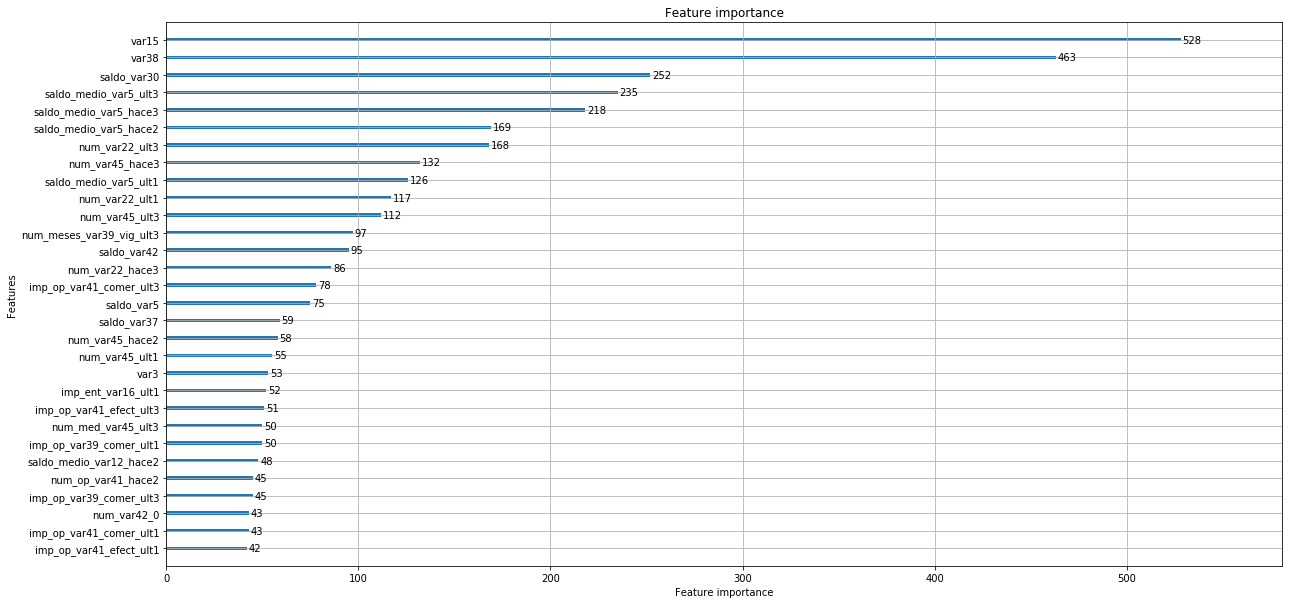

In [17]:
train_all = lgb.Dataset(train[good_cols], train['TARGET'])
# 设置参数
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'auc'},
    'max_depth': 4,
    'min_child_weight': 6,
    'num_leaves': 16,
    'learning_rate': 0.02,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.7,
    'bagging_freq': 5,
    #'lambda_l1':0.25,
    #'lambda_l2':0.5,
    #'scale_pos_weight':1,
}
model = lgb.train(params,
                train_all,
                num_boost_round=450,
                valid_sets=train_all,
                early_stopping_rounds=100,
                verbose_eval=100)
# 显示top30的特征
lgb.plot_importance(model,max_num_features = 30,figsize=(20,10))
plt.show()